In [132]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

import sys,cv2,copy
from tqdm import tqdm
sys.path.append('/opt/goat_41') # change this to the path of the 'goat_41'
from matplotlib import pyplot as plt

import numpy as np
from src.componenets.nih import NIH
from infer_pleural_effusion import PleuralEffusion

root = '/data1/pxi-dataset/cxr/public/nih/image_v1_1024' # change this to the path of the NIH dataset
nihtrain = NIH(root, 'train', image_size=512)
nihset = NIH(root, 'val', image_size=512)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
idxs_atel = [] # atelectasis, 3 
idxs_card = [] # cardiomegaly, 10
idxs_pleu = [] # pleural effusion, 1
idxs_ptxs = [] # pneumothorax, 12
idxs_infl = [] # infiltration, 15
idxs_cons = [] # consolidation, 5

for i in tqdm(range(len(nihset))):
    dummy = nihset[i]
    if'atelectasis' in dummy['label_name']:
        idxs_atel.append(i)
    if 'cardiomegaly' in dummy['label_name']:
        idxs_card.append(i)
    if 'effusion' in dummy['label_name']:
        idxs_pleu.append(i)
    if 'pneumothorax' in dummy['label_name']:
        idxs_ptxs.append(i)
    if 'infiltration' in dummy['label_name']:
        idxs_infl.append(i)
    if 'consolidation' in dummy['label_name']:
        idxs_cons.append(i)

In [133]:
print(idxs_pleu[:30])
model_atel = PleuralEffusion(weights='../resnet50_1_12.pth', device=0)

[7, 11, 12, 13, 14, 18, 19, 20, 23, 32, 33, 34, 35, 37, 190, 248, 351, 352, 365, 408, 431, 440, 445, 446, 449, 450, 451, 452, 462, 463]


effusion 0.17727604508399963


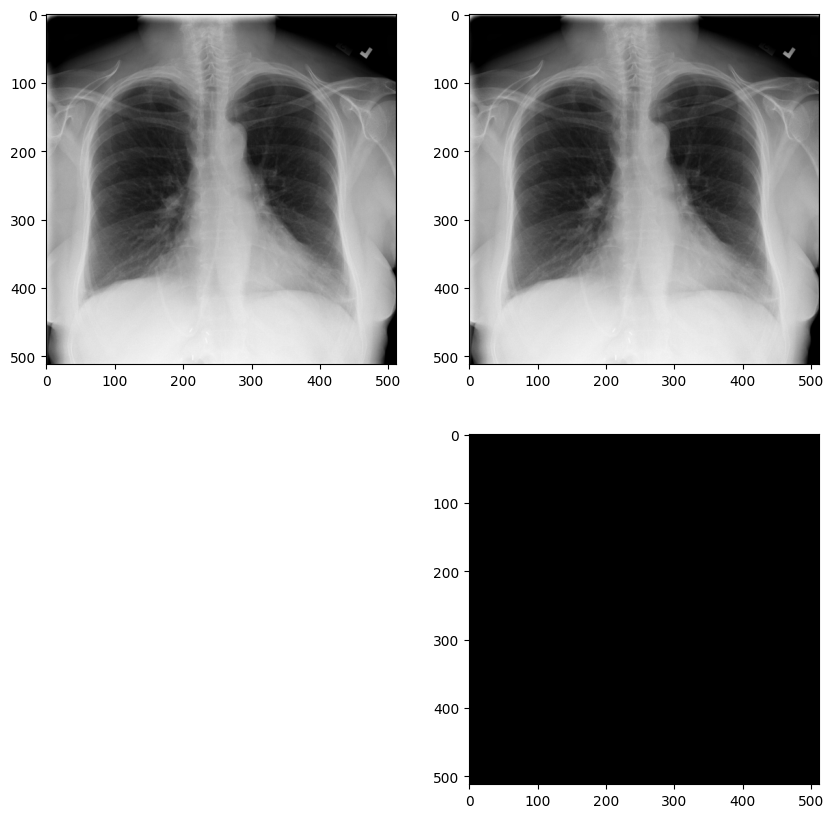

In [144]:
idx = 446
output = model_atel.run(nihset[idx]['path'])
print(nihset[idx]['label_name'], output['probabilty'])
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(output['image'])
plt.subplot(2,2,2)
plt.imshow(output['overlay_image'], cmap='jet')
plt.subplot(2,2,4)
plt.imshow(output['processed_activation_map'], cmap='jet')

In [74]:
print(idxs_atel[:30])
model_atel = PleuralEffusion(weights='../resnet50_3.pth', device=0)

[5, 11, 12, 19, 39, 40, 82, 112, 170, 172, 190, 212, 218, 221, 222, 223, 226, 227, 243, 253, 254, 255, 277, 278, 335, 358, 368, 438, 440, 444]


atelectasis_infiltration 0.5220621824264526


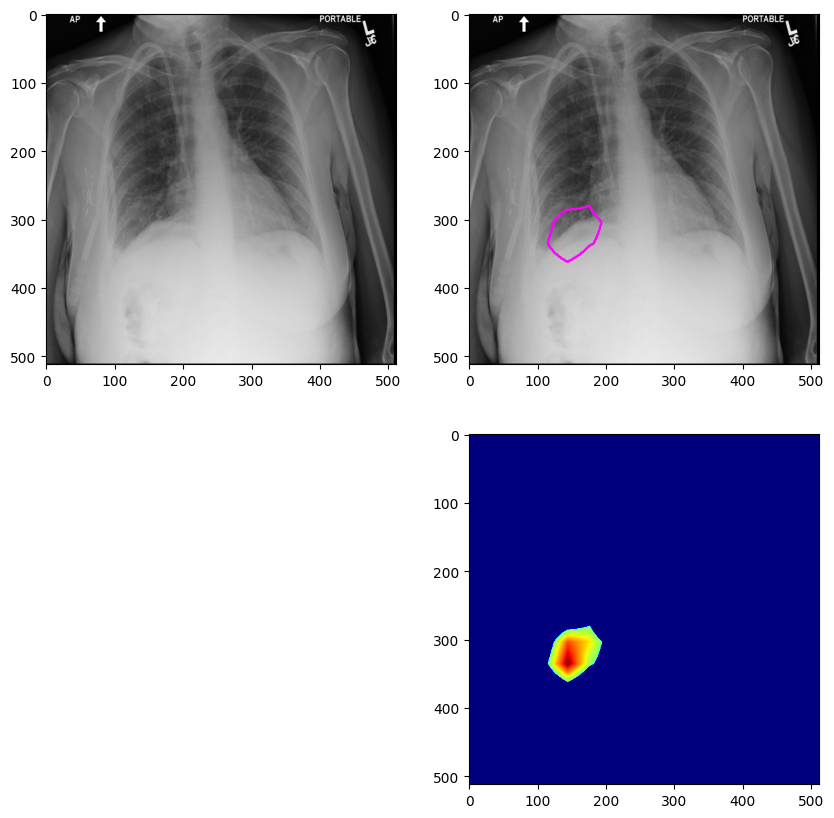

In [76]:
idx = 39
output = model_atel.run(nihset[idx]['path'])
print(nihset[idx]['label_name'], output['probabilty'])
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(output['image'])
plt.subplot(2,2,2)
plt.imshow(output['overlay_image'], cmap='jet')
plt.subplot(2,2,4)
plt.imshow(output['processed_activation_map'], cmap='jet')

In [89]:
print(idxs_card[:20]) # cardiomegaly, 10
model_card = PleuralEffusion(weights='../resnet50_10.pth', device=0, threshold=0.4)

[8, 9, 104, 171, 207, 215, 408, 431, 615, 644, 683, 709, 764]


cardiomegaly 0.08330634236335754


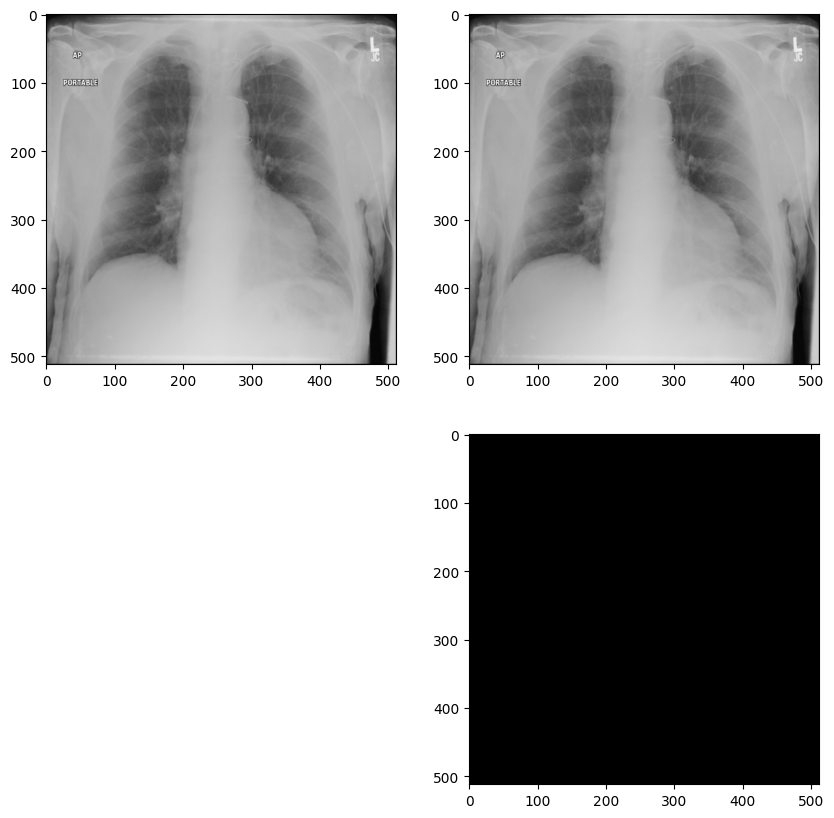

In [88]:
idx = 764
output = model_card.run(nihset[idx]['path'])
print(nihset[idx]['label_name'], output['probabilty'])
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(output['image'])
plt.subplot(2,2,2)
plt.imshow(output['overlay_image'], cmap='jet')
plt.subplot(2,2,4)
plt.imshow(output['processed_activation_map'], cmap='jet')

In [90]:
print(idxs_ptxs[:20])  # pneumothorax, 12
model_ptx = PleuralEffusion(weights='../resnet50_12.pth', device=0, threshold=0.4)

[24, 72, 73, 74, 75, 77, 189, 368, 383, 384, 385, 386, 387, 388, 389, 390, 392, 430, 431, 555]


pneumothorax 0.05655813217163086


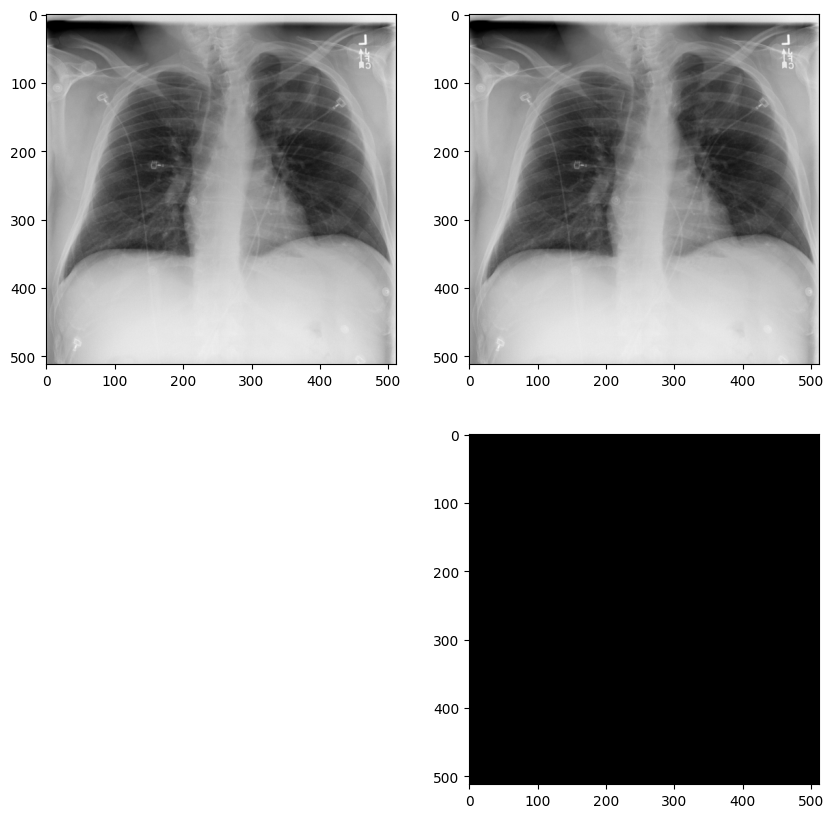

In [92]:
idx = 72
output = model_ptx.run(nihset[idx]['path'])
print(nihset[idx]['label_name'], output['probabilty'])
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(output['image'])
plt.subplot(2,2,2)
plt.imshow(output['overlay_image'], cmap='jet')
plt.subplot(2,2,4)
plt.imshow(output['processed_activation_map'], cmap='jet')

In [116]:
print(idxs_infl[:20])  # infiltration, 15
model_infl = PleuralEffusion(weights='../resnet50_15.pth', device=0, threshold=0.5)

[6, 12, 20, 29, 39, 40, 48, 50, 68, 74, 81, 93, 95, 113, 132, 141, 147, 158, 176, 190]


fibrosis_infiltration_pneumonia 0.6101394295692444


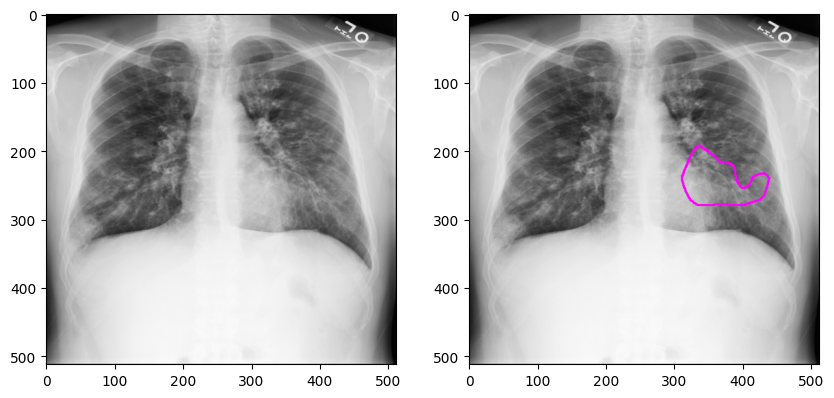

In [117]:
idx = 147
output = model_infl.run(nihset[idx]['path'])
print(nihset[idx]['label_name'], output['probabilty'])
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(output['image'])
plt.subplot(2,2,2)
plt.imshow(output['overlay_image'], cmap='jet')
# plt.subplot(2,2,4)
# plt.imshow(output['processed_activation_map'], cmap='jet')

In [123]:
print(idxs_cons[:20])  # consolidation, 5
model_cons = PleuralEffusion(weights='../resnet50_5.pth', device=0, threshold=0.5)

[104, 146, 149, 218, 223, 224, 246, 249, 352, 449, 453, 454, 455, 462, 463, 536, 537, 559, 560, 586]


atelectasis_consolidation_effusion_nodule 0.6353851556777954


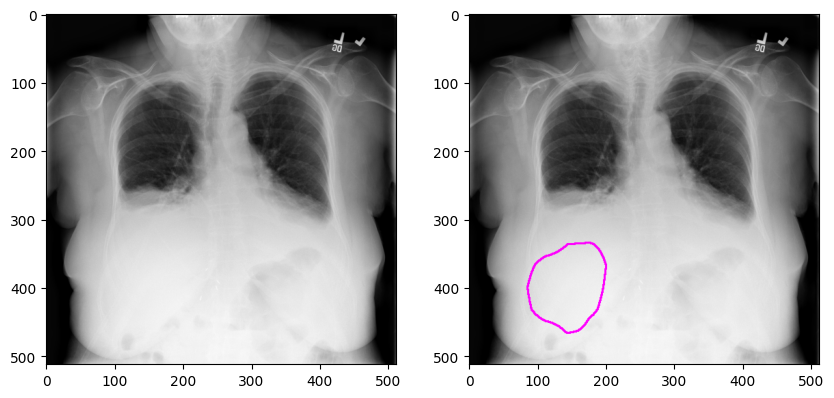

In [131]:
idx = 449
output = model_cons.run(nihset[idx]['path'])
print(nihset[idx]['label_name'], output['probabilty'])
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(output['image'])
plt.subplot(2,2,2)
plt.imshow(output['overlay_image'], cmap='jet')
# plt.subplot(2,2,4)
# plt.imshow(output['processed_activation_map'], cmap='jet')